In [4]:
## library

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Obtenir le site Web et extraire les données**

webpage = requests.get("...") : télécharge la page web à l’URL donnée et stocke la réponse HTTP (son contenu, son code de statut, etc.) dans la variable webpage.

soup = BeautifulSoup(webpage.content, "html.parser") : transforme le HTML brut de webpage en un objet BeautifulSoup pour pouvoir parcourir et extraire facilement des éléments de la page.

In [5]:

webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")


soup = BeautifulSoup(webpage.content, "html.parser")

Ici, nous utilisons la fonction **.find_all** sur la soup  variable que nous avons déclarée auparavant, cette soup  variable a le contenu du site Web, nous devons donc trouver ce dont nous avons besoin.


Dans le code, vous pouvez modifier "class"n'importe quelle balise HTML comme "id"et "class-name"n'importe quel nom de classe/id spécifique que vous souhaitez trouver.

In [3]:
#Stockez tout le texte en HTML avec la classe "Rating","CocoaPercent" et Company
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})
company_column=soup.find_all(attrs={"class": "Company"})
origin_column=soup.find_all(attrs={"class": "Origin"})



In [39]:

#rating_column
for rating in rating_column[:10]:
    print(rating.text)

Rating
3.75
2.75
3
3.5
3.5
2.75
3.5
3.5
3.75


In [7]:
#type(rating_column)
print(type(rating_column))

<class 'bs4.element.ResultSet'>


In [8]:
origin_column[0].get_text().replace("\n","")


'Specific Bean Origin               or Bar Name            '

In [14]:
#Faire des listes vides pour Rating et CocoaPercent
ratings = []
cocoa_percents = []
company=[]
origin=[]


#Boucle pour insérer chaque donnée de table dans la liste
for x in rating_column[1:]:
  ratings.append(float(x.get_text()))






for cm in company_column[1:]:
    company.append(cm.get_text())



for org in origin_column[1:]:
    origin.append(org.get_text())

for cacao in cocoa_percent_tags[1:]:
  cocoa_percents.append(cacao.get_text())

#Combiner les notes et la liste des pourcentages de cacao dans un dictionnaire
data = {"Company": company,"Origine spécifique du haricot":origin, "Rating": ratings, "CocoaPercentage": cocoa_percents}

#Créer une nouvelle trame de données à partir du dictionnaire de données
df = pd.DataFrame.from_dict(data)


In [10]:
df.head(10)

,Company,Origine spécifique du harirot,Rating,CocoaPercentage
0,A. Morin,Agua Grande,3.75,63%
1,A. Morin,Kpime,2.75,70%
2,A. Morin,Atsane,3.00,70%
3,A. Morin,Akata,3.50,70%
4,A. Morin,Quilla,3.50,70%
5,A. Morin,Carenero,2.75,70%
6,A. Morin,Cuba,3.50,70%
7,A. Morin,Sur del Lago,3.50,70%
8,A. Morin,Puerto Cabello,3.75,70%
9,A. Morin,Pablino,4.00,70%


In [11]:
df.shape

(1795, 4)

In [11]:
#df.to_csv('/content/export/GfG.csv', index = True)

# **Méthodes utiles de BeautifulSoup**

# **A. Rechercher des éléments**


| Méthode                          | Ce qu’elle fait                                                                        |
| -------------------------------- | -------------------------------------------------------------------------------------- |
| `find(name, attrs, string)`      | Retourne **le premier** élément qui correspond (par nom de balise, attributs, texte).  |
| `find_all(name, attrs, string)`  | Retourne **tous** les éléments correspondants (liste). Alias : `findAll`.              |
| `select(css_selector)`           | Retourne les éléments qui matchent un **sélecteur CSS** (ex. `"table.data td.price"`). |
| `select_one(css_selector)`       | Retourne **le premier** élément qui match un sélecteur CSS.                            |
| `find_parent(name, attrs)`       | Premier **parent** qui matche.                                                         |
| `find_parents(name, attrs)`      | **Tous les parents** qui matchent.                                                     |
| `find_next(name, attrs)`         | Prochain élément **après** dans le flux qui matche.                                    |
| `find_all_next(name, attrs)`     | **Tous** les suivants qui matchent.                                                    |
| `find_previous(name, attrs)`     | Élément **avant** dans le flux qui matche.                                             |
| `find_all_previous(name, attrs)` | **Tous** les précédents qui matchent.                                                  |


**B. Naviguer dans l’arbre**

| Méthode/Attribut                          | Ce qu’elle fait                                                |
| ----------------------------------------- | -------------------------------------------------------------- |
| `tag.parent` / `tag.parents`              | Accéder au parent / itérer sur tous les parents.               |
| `tag.next_sibling` / `previous_sibling`   | Frère **suivant** / **précédent** immédiat.                    |
| `tag.next_siblings` / `previous_siblings` | Itérateurs sur **tous** les frères suivants/précédents.        |
| `tag.children` / `tag.descendants`        | Itérateurs sur **enfants directs** / **tous les descendants**. |
| `tag.contents`                            | **Liste** des enfants directs.                                 |
| `soup.title`, `soup.head`, `soup.body`    | Accès rapide au **premier** tag de ce type.                    |


In [1]:
# Test de l'Extraction des données via le module extraction.webscrapping sans colonnes spécifiées

from etl_package import ExtractionData 

url = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"
colonnes = ["Company", "Origin", "Rating","Cocoa Percent"]

df_all = ExtractionData.extract_webscrapping(url)
print(df_all.head())

  Company \n               (Maker-if known)  \
0                                  A. Morin   
1                                  A. Morin   
2                                  A. Morin   
3                                  A. Morin   
4                                  A. Morin   

  Specific Bean Origin\n               or Bar Name   REF  \
0                                      Agua Grande  1876   
1                                            Kpime  1676   
2                                           Atsane  1676   
3                                            Akata  1680   
4                                           Quilla  1704   

  Review\n               Date Cocoa\n               Percent  \
0                        2016                           63%   
1                        2015                           70%   
2                        2015                           70%   
3                        2015                           70%   
4                        2015            

In [2]:
# Nettoyer l'affichage des colonnes 
ExtractionData._nettoyer_colonnes(df_all)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.5,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.5,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.5,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [3]:
# automatisation de l'extraction des données par webscrapping

from etl_package import ExtractionData 
url = "https://content.codecademy.com/courses/beautifulsoup/cacao/index.html"

colonnes = ["Company", "Origin", "Rating", "CocoaPercent"]
noms_final = ["Company", "Origine spécifique du haricot", "Rating", "CocoaPercentage"]

df = ExtractionData.extract_webscrapping(
    url, 
    columns_to_extract=colonnes, 
    rename_columns=noms_final
)

print(df.head())


    Company Origine spécifique du haricot Rating CocoaPercentage
0  A. Morin                   Agua Grande   3.75             63%
1  A. Morin                         Kpime   2.75             70%
2  A. Morin                        Atsane      3             70%
3  A. Morin                         Akata    3.5             70%
4  A. Morin                        Quilla    3.5             70%


In [16]:
# Détection de valeurs doubles dans la df

from etl_package import ValeurDouble
print(ValeurDouble.calcul_valeur_double(df))

Il n'y a pas de valeur double dans la DataFrame.
None


In [17]:
# Détection de valeurs doubles dans la df

from etl_package import ValeurManquante
print(ValeurManquante.calcul_valeur_manquante(df))

Company                          0
Origine spécifique du haricot    0
Rating                           0
CocoaPercentage                  0
dtype: int64


In [18]:
# Vérification des types de colonne de la df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Company                        1795 non-null   object
 1   Origine spécifique du haricot  1795 non-null   object
 2   Rating                         1795 non-null   object
 3   CocoaPercentage                1795 non-null   object
dtypes: object(4)
memory usage: 56.2+ KB


In [19]:
# Changement du type de la colonne "Rating" en float

from etl_package.transformation.type_colonne import TypeColonne
TypeColonne.changer_type_colonne(df,cols="Rating",type_="float",inplace =True)

La colonne 'Rating' a été convertie en float64


In [21]:
# Transformation du type des colonnes "Company Location" et "Broad Bean Origin" en string
from etl_package.transformation.type_colonne import TypeColonne

TypeColonne.changer_type_colonne(df,cols=["Company","Origine spécifique du haricot"],type_="string",inplace = True)

La colonne 'Company' a été convertie en string
La colonne 'Origine spécifique du haricot' a été convertie en string


In [22]:
# Vérification du changement effectif
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company                        1795 non-null   string 
 1   Origine spécifique du haricot  1795 non-null   string 
 2   Rating                         1795 non-null   float64
 3   CocoaPercentage                1795 non-null   object 
dtypes: float64(1), object(1), string(2)
memory usage: 56.2+ KB


In [24]:
# Transformation de la colonne "Cocoa Percent"
from etl_package import RemplacementColonne

RemplacementColonne.remplacer_valeurs(df,colonne = "CocoaPercentage",remplacement=("%",""),divide=True,inplace= True)

 Remplacement effectué et colonne 'CocoaPercentage' divisée par 100.


,Company,Origine spécifique du haricot,Rating,CocoaPercentage
0,A. Morin,Agua Grande,3.75,0.63
1,A. Morin,Kpime,2.75,0.70
2,A. Morin,Atsane,3.00,0.70
3,A. Morin,Akata,3.50,0.70
4,A. Morin,Quilla,3.50,0.70
...,...,...,...,...
1790,Zotter,Peru,3.75,0.70
1791,Zotter,Congo,3.00,0.65
1792,Zotter,Kerala State,3.50,0.65
1793,Zotter,Kerala State,3.25,0.62


In [25]:
# Détection de valeurs abérantes dans la colonne Rating

from etl_package import ZScoreAnomalie
print(ZScoreAnomalie.calcul_zscore(df,colonne="Rating"))

La colonne Rating contient 19 valeurs abérantes
78      5.00
86      5.00
125     1.75
132     1.75
245     1.50
249     1.50
324     1.50
326     1.00
437     1.00
449     1.50
465     1.00
554     1.50
828     1.75
988     1.50
1129    1.50
1175    1.00
1411    1.50
1492    1.50
1694    1.50
Name: Rating, dtype: float64


<Axes: >

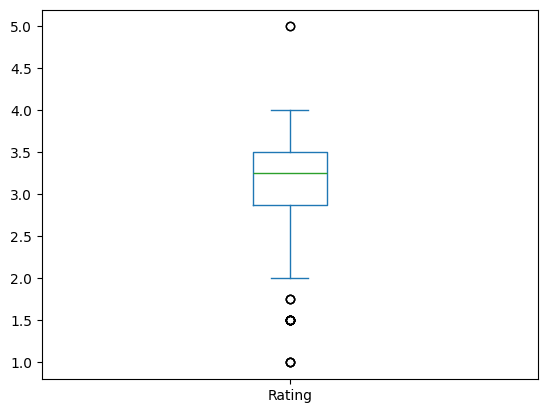

In [23]:
df["Rating"].plot(kind="box")

In [3]:
# Normaliser la colonne Rating en utilisant la méthode min-max

from etl_package import NormaliserColonne
NormaliserColonne.normaliser_colonne_choisie(df,col="Rating",inplace=True)

La colonne 'Rating' a été normalisée entre 0 et 1 .


,Company Location,Broad Bean Origin,Rating,Cocoa Percent
0,A. Morin,Agua Grande,0.6875,63%
1,A. Morin,Kpime,0.4375,70%
2,A. Morin,Atsane,0.5000,70%
3,A. Morin,Akata,0.6250,70%
4,A. Morin,Quilla,0.6250,70%
...,...,...,...,...
1790,Zotter,Peru,0.6875,70%
1791,Zotter,Congo,0.5000,65%
1792,Zotter,Kerala State,0.6250,65%
1793,Zotter,Kerala State,0.5625,62%


In [26]:
# Test de l'Imputation si necessaiire des valeurs manquantes dans la colonne "Rating"

from etl_package import Imputateur
Imputateur.imputer_colonne(df,colonne="Rating",strategie="mediane")

 Colonne 'Rating' ne contient aucun NaN → aucune imputation nécessaire.


0       3.75
1       2.75
2       3.00
3       3.50
4       3.50
        ... 
1790    3.75
1791    3.00
1792    3.50
1793    3.25
1794    3.00
Name: Rating, Length: 1795, dtype: float64

In [27]:
# Test de l'imputation supervisée des valeurs manquantes sur la colonne "Rating"

from etl_package import ImputateurML
from sklearn.ensemble import RandomForestRegressor
modele = RandomForestRegressor(random_state=42)

df3 = ImputateurML.imputer_colonne_ml(df,colonne_cible="Rating",modele = modele)

 Colonne 'Rating' ne contient aucun NaN → aucune imputation nécessaire.


In [33]:
# Charger les données vers un CSV

from etl_package import Loader
Loader.vers_csv(df, "/Users/m12020/Downloads/PACKAGE_ETL/data_export/cocoa.csv")


DataFrame sauvegardé en CSV : /Users/m12020/Downloads/PACKAGE_ETL/data_export/cocoa.csv


DataFrame sauvegardé en CSV : personnes.csv


In [36]:
# Chargement vers une base sql

from sqlalchemy import create_engine
engine = create_engine("sqlite:///cocoa.db")
Loader.vers_sql(df, "cocoa", engine, if_exists="replace")

DataFrame chargé dans la table SQL : cocoa
